In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment3.ipynb")

# Linear Algebra Refresher and an Introduction to NumPy

This assignment aims to refresh your understanding of key linear algebra concepts that are fundamental to data science and machine learning, with a focus on practical implementation using NumPy. NumPy (Numerical Python) is a foundational library for scientific computing in Python and is another vital tool we'll be using in this class. It provides support for large, multi-dimensional arrays and matrices, along with a vast collection of high-level mathematical functions to operate on these arrays efficiently. 

You'll find the [Numpy documentation](https://numpy.org/doc/stable/) useful in this assignment.

You should write code in the cells marked with "YOUR CODE HERE" or "..."

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(701)

## Part 1 - Basics

You can turn a Python array, such as a list, of any dimensions into a Numpy array using `np.array()`.

In [3]:
py_array = [1, 2, 3, 4, 5]
np_array = np.array(py_array)

py_array2 = [[1, 2, 3], [4, 5, 6]]
np_array2 = np.array(py_array2)

print(py_array)
print(np_array)
print(py_array2)
print(np_array2)

[1, 2, 3, 4, 5]
[1 2 3 4 5]
[[1, 2, 3], [4, 5, 6]]
[[1 2 3]
 [4 5 6]]


#### **Question 1:** 

A very common operation is checking the shape of an array. You can check the shape of a numpy array using the `.shape` attribute. Print the shapes of the two numpy arrays we created above in the next cell.

In [4]:
np_array_shape = np_array.shape
print(np_array_shape)
print(type(np_array_shape))

np_array2_shape = np_array2.shape
print(np_array2_shape)

(5,)
<class 'tuple'>
(2, 3)


In [5]:
grader.check("q1")

q1 results: All test cases passed!

#### **Question 2:**

Now, use the [numpy random module](https://numpy.org/doc/stable/reference/random/index.html) to create a 3x3 array of random integers from 1 to 10. 

In [6]:
rng = np.random.default_rng()
random_array = rng.integers(low=1, high=11, size=(3, 3))

print("3x3 array of random numbers from 1 to 10:")
print(random_array)

3x3 array of random numbers from 1 to 10:
[[ 3  3 10]
 [ 9  4  3]
 [ 6  6  9]]


In [7]:
grader.check("q2")

q2 results: All test cases passed!

You can perform element wise addition, subtraction, multiplication, and division on two arrays. 

In [9]:
a1 = np.array([1, 2, 3])
a2 = np.array([4, 5, 6])

print("Element wise addition:", a1 + a2)
print("Element wise subtraction:", a1 - a2)
print("Element wise multiplication:", a1 * a2)
print("Element wise division:", a1 / a2)

Element wise addition: [5 7 9]
Element wise subtraction: [-3 -3 -3]
Element wise multiplication: [ 4 10 18]
Element wise division: [0.25 0.4  0.5 ]


#### **Question 3:** 

Use the [`.dot` method](https://numpy.org/doc/1.21/reference/generated/numpy.ndarray.dot.html) to compute the dot product of vectors $a_1$ and $a_2$.

In [10]:
dot_product = a1.dot(a2)

In [11]:
grader.check("q3")

q3 results: All test cases passed!

### Question 4

Compute the matrix product of the two matrices defined below, $M_1$ and $M_2$. You can use [`np.matmul`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) or its shorthand `@`. 

In [12]:
M1 = np.array([[1, 2], 
               [3, 4]])

M2 = np.array([[5, 6], 
               [7, 8]])

product = M1 @ M2

print("Matrix product of M1 and M2:")
print(product)

Matrix product of M1 and M2:
[[19 22]
 [43 50]]


In [13]:
grader.check("q4")

q4 results: All test cases passed!

## Broadcasting

A key strength of Numpy is [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) - treating arrays of different shapes during arithmetic operations. Let's play with it here. 

In [14]:
# EXAMPLE
a = np.array([1.0, 2.0, 3.0])
b = 2.0

print("Broadcasting a + b:", a + b)
print("Broadcasting a - b:", a - b)
print("Broadcasting a * b:", a * b)
print("Broadcasting a / b:", a / b)


Broadcasting a + b: [3. 4. 5.]
Broadcasting a - b: [-1.  0.  1.]
Broadcasting a * b: [2. 4. 6.]
Broadcasting a / b: [0.5 1.  1.5]


### Question 5

For this exercise, do the following:

1. Create a 2D array called `a1` with shape (3, 4) containing random integers between 1 and 10 (exclusive), in other words between 1 and 9 (inclusive).
   
2. Create a 1D array called `b1` with shape (4,) containing random integers between 1 and 5 (exclusive), in other words between 1 and 9 (inclusive).
   
3. Use broadcasting to add b to each row of `a1`.
   
4. Print the original arrays and the result. 

In [16]:
rng = np.random.default_rng(701)

a1 = rng.integers(low=1, high=10, size=(3, 4))
b1 = rng.integers(low=1, high=5, size=(4,))

print("A1:\n", a1)
print("B1:\n", b1)

result = a1 + b1

print("\nResult:\n", result)

A1:
 [[1 9 7 9]
 [3 8 1 9]
 [5 9 3 3]]
B1:
 [1 1 1 2]

Result:
 [[ 2 10  8 11]
 [ 4  9  2 11]
 [ 6 10  4  5]]


In [17]:
grader.check("q5")

q5 results: All test cases passed!

### Question 6

Let's demonstrate broadcasting with a concrete example. We'll create a 100x100x3 array that will represent an RGB image (red, green, blue). Specifically, every row and column contains an array of 3 values - level of red (R), level of green (G) and level of blue (B). Every one of those values ('levels') is in the range 0 (black) to 255 (brightest).

Here is a random 100x100x3 image:


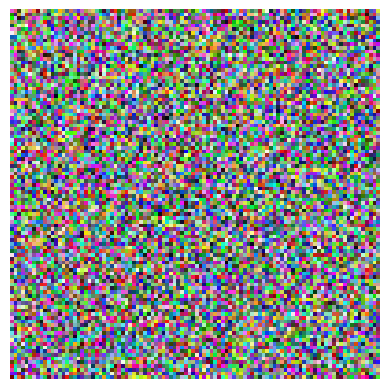

In [31]:
np.random.seed(701)

random_image = np.random.randint(0, 255, size=(100, 100, 3))

print("Here is a random 100x100x3 image:")
plt.imshow(random_image)
plt.axis('off')
plt.show()

In [32]:
print("Level of red (R), level of green (G) and level of blue (B) at the top left corner of the image:")
print(random_image[0][0])

Level of red (R), level of green (G) and level of blue (B) at the top left corner of the image:
[230  84 212]


We can use broadcasting to alter the colors of the image. For this exercise, create a 1D array of length 3 to represent brightness adjustments. For example, [1.1, 0.9, 1.2] to brighten red, darken green, and brighten blue (NOTE: Do NOT use numpy.random for this, create it yourself.)

Then, use broadcasting to apply these adjustments to the entire image. 

You might need to clip the resulting values to ensure they stay within the valid range (0-255).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..304].


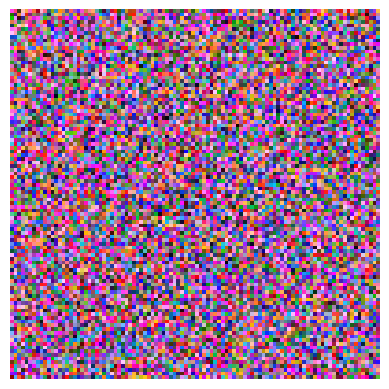

In [33]:
from copy import deepcopy

changed_image = deepcopy(random_image)

brightness_adjustments = [1.2, 0.8, 1.1]

changed_image = changed_image * brightness_adjustments

changed_image = changed_image.astype(int)
plt.imshow(changed_image)
plt.axis('off')
plt.show()


Feel free to play around with the brightness adjustments! 

In [34]:
grader.check("q6")

q6 results: All test cases passed!

## Part 2 - Linear Algebra with Numpy

For this part, you should find the appropriate functions and methods from the documentation or online. 

### Question 7

Calculate the $\ell_2$ norm of the vector $v_1$.  See numpy's [norm](https://numpy.org/doc/2.3/reference/generated/numpy.linalg.norm.html).

In [22]:
np.random.seed(701)

v1 = np.random.randint(0, 10, size=10)
print("Vector v1:", v1)

magnitude = np.linalg.norm(v1)

print(f"l2 norm of v1: {magnitude:.2f}")

Vector v1: [6 4 4 5 6 8 5 9 2 7]
l2 norm of v1: 18.76


In [23]:
grader.check("q7")

q7 results: All test cases passed!

### Matrix Decompositions

### Question 8

Use Numpy to get the eigenvalues and eigenvectors of a given matrix $M_3$. 
See numpy's [eig](https://numpy.org/doc/2.3/reference/generated/numpy.linalg.eig.html) function.

In [24]:
M3 = np.array([[10, 15, 20],
               [25, 30, 35],
               [40, 45, 50]])

eigenvalues, eigenvectors = np.linalg.eig(M3)

print(f"Eigenvalues of M3: {[f'{x:.2f}' for x in eigenvalues]}")
print(f"Eigenvectors of M3: {[[f'{x:.2f}' for x in v] for v in eigenvectors]}")

Eigenvalues of M3: ['94.75', '-4.75', '-0.00']
Eigenvectors of M3: [['-0.28', '-0.78', '0.41'], ['-0.54', '-0.07', '-0.82'], ['-0.79', '0.63', '0.41']]


In [25]:
grader.check("q8")

q8 results: All test cases passed!

#### Question 9

Verify that $Av = λv$ for each eigenpair $(λ, v)$ you found. 

Reconstruct the matrix using the eigendecomposition that we describe in the
[notes](https://tools4ds.github.io/DS701-Course-Notes/04-Linear-Algebra-Refresher.html#eigendecomposition). 


In [27]:

for i in range(len(eigenvalues)):
    lambda_i = eigenvalues[i]
    v_i = eigenvectors[:, i]
    left = M3 @ v_i
    right = lambda_i * v_i
    assert np.allclose(left, right), f"Eigenpair {i+1} verification failed"
    print(f"Eigenpair {i+1} (λ={lambda_i:.2f}): M3 @ v ≈ λv: {np.allclose(left, right)}")

M3_reconstructed = eigenvectors @ np.diag(eigenvalues) @ np.linalg.inv(eigenvectors)

print("Reconstructed M3:", M3_reconstructed)

Eigenpair 1 (λ=94.75): M3 @ v ≈ λv: True
Eigenpair 2 (λ=-4.75): M3 @ v ≈ λv: True
Eigenpair 3 (λ=-0.00): M3 @ v ≈ λv: True
Reconstructed M3: [[10. 15. 20.]
 [25. 30. 35.]
 [40. 45. 50.]]


In [28]:
grader.check("q9")

q9 results: All test cases passed!

### Question 10: Singular Value Decomposition

Decompose and reconstruct the matrix in the same manner for the Singular Value Decomposition below. 
See [svd](https://numpy.org/doc/2.3/reference/generated/numpy.linalg.svd.html).

In [29]:
U, s, V = np.linalg.svd(M3)

print(f"Singular values of M3: {[f'{x:.2f}' for x in s]}")
print(f"U matrix of M3: {[[f'{x:.2f}' for x in v] for v in U]}")
print(f"V matrix of M3: {[[f'{x:.2f}' for x in v] for v in V]}")

M3_reconstructed = U @ np.diag(s) @ V

print("Reconstructed M3:", M3_reconstructed)

Singular values of M3: ['97.87', '4.60', '0.00']
U matrix of M3: [['-0.27', '0.87', '0.41'], ['-0.54', '0.22', '-0.82'], ['-0.80', '-0.44', '0.41']]
V matrix of M3: [['-0.49', '-0.57', '-0.66'], ['-0.77', '-0.07', '0.64'], ['-0.41', '0.82', '-0.41']]
Reconstructed M3: [[10. 15. 20.]
 [25. 30. 35.]
 [40. 45. 50.]]


In [30]:
grader.check("q10")

q10 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)